
In this notebook, You will do amazon review classification with BERT.[Download data from [this](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) link]
<pre> 
It contains 5 parts as below.  Detailed instrctions are given in the each cell. please read every comment we have written. 
    1. Preprocessing 
    2. Creating a BERT model from the Tensorflow HUB.
    3. Tokenization
    4. getting the pretrained embedding Vector for a given review from the BERT.
    5. Using the embedding data apply NN and classify the reviews.
    6. Creating a Data pipeline for BERT Model. 

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. 
    If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List if we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>
</pre>

In [1]:
#in this assignment you need two files reviews.csv and tokenization file
#you can use gdown module to import both the files in colab from Google drive
#the syntax is for gdown is !gdown --id file_id
#please run the below cell to import the required files

In [2]:
!pip install gdown

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - \ | done
  Preparing metadata (pyproject.toml) ... - \ | done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=a38b94f3c81eaf19b1ccf9890ec91429a08585569df12a538027ff440e86185a
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown


In [3]:
!gdown --id 1GsD8JlAc_0yJ-1151LNr6rLw83RRUPgt
!gdown --id 13exfXiyiByluh1PfYK1EyZyizqxeCVG9

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GsD8JlAc_0yJ-1151LNr6rLw83RRUPgt
To: /kaggle/working/Reviews.csv
100%|████████████████████████████████████████| 301M/301M [00:04<00:00, 66.2MB/s]
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13exfXiyiByluh1PfYK1EyZyizqxeCVG9
To: /kaggle/working/tokenization.py
100%|██████████████████████████████████████| 17.3k/17.3k [00:00<00:00, 22.1MB/s]


In [4]:
#all imports
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [5]:
tf.test.gpu_device_name()

2022-03-03 04:25:05.674138: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-03 04:25:05.724837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:05.814026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:05.814728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

'/device:GPU:0'

ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:07.596556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:07.597154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


<font size=4>Grader function 1 </font>

In [6]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [7]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv(r"Reviews.csv")
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
#get only 2 columns - Text, Score
#drop the NAN values

data = reviews[['Text','Score']]
print(data.shape)
data.head()

(568454, 2)


,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    568454 non-null  object
 1   Score   568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [10]:
#no null values present

In [11]:
data = data.dropna()
print(data.shape)
data.head()

(568454, 2)


,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [12]:
data.drop(data[data['Score'] == 3].index, inplace = True)
data.shape

(525814, 2)

In [13]:
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows. 

def partition(x):
    if x < 3:
        return 0
    return 1

data['Score'] = data['Score'].map(partition)

In [14]:
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [15]:
reviews = data
reviews.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


<font size=4>Grader function 2 </font>

In [16]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [17]:
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [18]:
print(reviews.shape)
reviews.head()

(100000, 3)


,Text,Score,len
64117,The tea was of great quality and it tasted lik...,1,30
418112,My cat loves this. The pellets are nice and s...,1,31
357829,Great product. Does not completely get rid of ...,1,41
175872,This gum is my favorite! I would advise every...,1,27
178716,I also found out about this product because of...,1,22


In [19]:
reviews.Text.iloc[51]

'A fairly expensive item but kitty loves it. Ofcourse plain old kitten<br />food does not taste good after eating these treats.'

In [20]:
#remove HTML from the Text column and save in the Text column only
#reference notebook

from tqdm import tqdm
from bs4 import BeautifulSoup
import re
preprocessed_reviews = []
#tqdm is used for printing status bar

for sentence in tqdm(reviews['Text'].values):
    sentence = re.sub(r"http\S+", " ", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = re.sub("\S*\dS*", " ",sentence).strip()
    sentence = re.sub('[^A-Za-z]+', " ", sentence)
    
    preprocessed_reviews.append(sentence.strip())

100%|██████████| 100000/100000 [00:26<00:00, 3776.08it/s]


In [21]:
reviews['Text'] = preprocessed_reviews

In [22]:
reviews.head()

,Text,Score,len
64117,The tea was of great quality and it tasted lik...,1,30
418112,My cat loves this The pellets are nice and sma...,1,31
357829,Great product Does not completely get rid of h...,1,41
175872,This gum is my favorite I would advise everyon...,1,27
178716,I also found out about this product because of...,1,22


In [23]:
y = reviews.Score.values

In [24]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
#split the data into train and test data(20%) with Stratify sampling, random state 33, 

# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(reviews[['Text','len']],y,test_size = 0.2,stratify = y,random_state = 33)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 2), (20000, 2), (80000,), (20000,))

In [27]:
#plot bar graphs of y_train and y_test

<AxesSubplot:xlabel='0'>

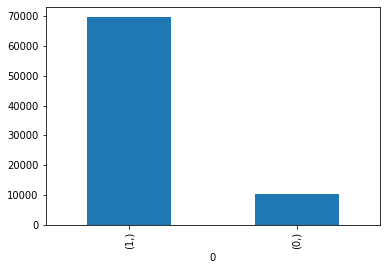

In [28]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='0'>

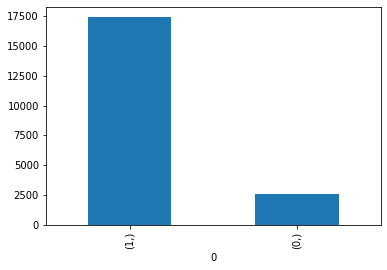

In [29]:
pd.DataFrame(y_test).value_counts().plot(kind='bar')

In [30]:
#saving to disk. if we need, we can load preprocessed data directly. 
reviews.to_csv('preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERt. 
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [31]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


2022-03-03 04:25:57.542231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:57.543092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:57.543727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:57.544610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:25:57.545261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [32]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [33]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [34]:
!ls

Reviews.csv  __notebook__.ipynb  preprocessed.csv  tokenization.py


In [35]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [36]:
import tokenization #- #We have given tokenization.py file

In [37]:
# Create tokenizer " Instantiate FullTokenizer" 
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case 
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation


In [38]:
# if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
#!pip install sentencepiece
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

<font size=4>Grader function 3 </font>

In [39]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [40]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and

# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens.

# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)

# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)

# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'),
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask

# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)

# type of all the above arrays should be numpy arrays

# after execution of this cell, you have to get
# X_train_tokens, X_train_mask, X_train_segment
# X_test_tokens, X_test_mask, X_test_segment

In [41]:
def create_tokens(sent):

    tks = tokenizer.tokenize(sent)
    tks = tks[0:(max_seq_length-2)]
    tks = ['[CLS]',*tks,'[SEP]']

    mask_sen = np.array([1]*len(tks)+[0]*(max_seq_length-len(tks)))
    seg_sen = np.array([0]*max_seq_length)
    token_sen = np.array(tokenizer.convert_tokens_to_ids(tks)+[0]*(max_seq_length-len(tks)))
    return token_sen, mask_sen, seg_sen

In [42]:
X_train

,Text,len
33523,I had never tried this brand before so I was w...,28
10855,I love these for a snack I get a nice taste of...,43
390364,This is my favorite store bought cookie Crumbl...,34
53902,I must be spoiled because this coffee was very...,41
467717,the tins are much smaller than I expected but ...,27
...,...,...
497346,Love the apple cider wish you could get it in ...,25
551921,Whenever I visit Chicago I have to stop by Gar...,49
344823,I started buying YS Organic raw honey about ye...,46
208175,My order arrived today august th But the produ...,44


In [43]:
from tqdm import tqdm
X_train_tk = []
X_train_mask = []
X_train_segm = []

for sent in tqdm(X_train['Text'].values):
    token, mask, seg = create_tokens(sent)
    X_train_tk.append(token)
    X_train_mask.append(mask)
    X_train_segm.append(seg)

100%|██████████| 80000/80000 [00:58<00:00, 1364.64it/s]


In [44]:
X_train_tk = np.array(X_train_tk)
X_train_mask = np.array(X_train_mask)
X_train_segm = np.array(X_train_segm)
X_train_tk.shape,X_train_mask.shape,X_train_segm.shape

((80000, 55), (80000, 55), (80000, 55))

In [45]:
X_test_tk = []
X_test_mask = []
X_test_segm = []

for sent in tqdm(X_test['Text'].values):
    token, mask, seg = create_tokens(sent)
    X_test_tk.append(token)
    X_test_mask.append(mask)
    X_test_segm.append(seg)

100%|██████████| 20000/20000 [00:14<00:00, 1378.90it/s]


In [46]:
X_test_tk = np.array(X_test_tk)
X_test_mask = np.array(X_test_mask)
X_test_segm = np.array(X_test_segm)
X_test_tk.shape,X_test_mask.shape,X_test_segm.shape

((20000, 55), (20000, 55), (20000, 55))

#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

In [47]:
import pickle

In [48]:
X_train_tokens = X_train_tk
X_train_mask = X_train_mask
X_train_segment = X_train_segm
X_test_tokens = X_test_tk
X_test_mask = X_test_mask
X_test_segment = X_test_segm

In [49]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

In [50]:
#you can load from disk
#X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb')) 
#X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb')) 

<font size=4>Grader function 4 </font>

In [51]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_train_segment)
        
        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

<font size=4>Grader function 5 </font>

In [52]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segment)
        
        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [53]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [54]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [55]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
#this cell will take some time to execute, make sure thay you have stable internet connection
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

2022-03-03 04:27:37.662351: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [56]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [57]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

In [58]:
#X_train_pooled_output, X_test_pooled_output= pickle.load(open('final_output.pkl', 'rb'))

<font size=4>Grader function 6 </font>

In [59]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1.<b> You have to use AUC as metric. Do not use tf.keras.metrics.AUC</b> 
<b> You have to write custom code for AUC and print it at the end of each epoch</b> 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [60]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import datetime
from keras.callbacks import EarlyStopping
import keras.backend as K

In [61]:
X_train_pooled_output.shape[1]

768

In [62]:
##create an Neural Network and train your model on X_train_pooled_output and y_train
# you can start as follows
#input_layer=Input(shape=(X_train_pooled_output.shape[1],))
#reference notebook

input_layer=Input(shape=(X_train_pooled_output.shape[1],))

Dnsl = Dense(224,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(input_layer)

Dnsl = Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(Dnsl)

Dnsl = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(Dnsl)

Dnsl = Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(Dnsl)

output = Dense(2, activation='softmax', name='output')(Dnsl)
model = Model(inputs=[input_layer],outputs=[output])

In [63]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 224)               172256    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 211,458
Trainable params: 211,458
Non-trainable params: 0
_____________________________________________________

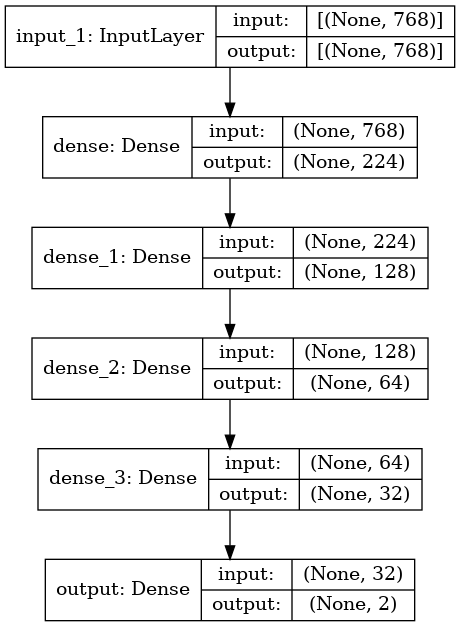

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [65]:
from keras.utils import np_utils
y_train_enc = np_utils.to_categorical(y_train, 2) 
y_test_enc = np_utils.to_categorical(y_test, 2)
y_train_enc.shape,y_test_enc.shape

((80000, 2), (20000, 2))

In [66]:
#https://www.tensorflow.org/api_docs/python/tf/py_function
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2

from sklearn.metrics import roc_auc_score
import tensorflow as tf
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def aucroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double) #tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def changeLearningRate(epoch,lr):
    if epoch<20:
        lr=0.001
        return lr
    else :
        lr=0.0001
        return lr

In [67]:
lrschedule = tf.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',aucroc])

#earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=3, verbose=1)

filepath= "best_model_L1.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_aucroc',  verbose=1, save_best_only=True, mode='max')

In [68]:
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model.fit([X_train_pooled_output],y_train_enc,epochs=35, 
            validation_data=([X_test_pooled_output],y_test_enc), 
            batch_size=128,
           callbacks=[checkpoint,tensorboard_callback,lrschedule])

2022-03-03 04:32:07.066329: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-03 04:32:07.066375: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-03 04:32:07.068367: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-03-03 04:32:07.362485: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-03 04:32:07.362667: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/35
  1/625 [..............................] - ETA: 8:49 - loss: 1.4736 - accuracy: 0.8438 - aucroc: 0.4939

2022-03-03 04:32:08.819394: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-03 04:32:08.819442: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/625 [..............................] - ETA: 2:30 - loss: 1.4870 - accuracy: 0.8516 - aucroc: 0.5247

2022-03-03 04:32:09.055124: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-03 04:32:09.056130: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-03 04:32:09.206273: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 131 callback api events and 124 activity events. 
2022-03-03 04:32:09.214415: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-03 04:32:09.234000: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09

2022-03-03 04:32:09.239738: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09/5e7bc349c0ac.trace.json.gz


 23/625 [>.............................] - ETA: 17s - loss: 1.2042 - accuracy: 0.8682 - aucroc: 0.7271

2022-03-03 04:32:09.260983: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09

2022-03-03 04:32:09.262394: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09/5e7bc349c0ac.memory_profile.json.gz
2022-03-03 04:32:09.263408: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09
Dumped tool data for xplane.pb to logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09/5e7bc349c0ac.xplane.pb
Dumped tool data for overview_page.pb to logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09/5e7bc349c0ac.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/fits/20220303-043207/train/plugins/profile/2022_03_03_04_32_09/5e7bc349c0ac.input_pipelin

625/625 [==============================] - 6s 8ms/step - loss: 0.5867 - accuracy: 0.8924 - aucroc: 0.9001 - val_loss: 0.3982 - val_accuracy: 0.9007 - val_aucroc: 0.9265

Epoch 00001: val_aucroc improved from -inf to 0.92654, saving model to best_model_L1.h5
Epoch 2/35
625/625 [==============================] - 5s 7ms/step - loss: 0.3548 - accuracy: 0.9086 - aucroc: 0.9357 - val_loss: 0.3530 - val_accuracy: 0.8996 - val_aucroc: 0.9330

Epoch 00002: val_aucroc improved from 0.92654 to 0.93297, saving model to best_model_L1.h5
Epoch 3/35
625/625 [==============================] - 5s 8ms/step - loss: 0.3051 - accuracy: 0.9108 - aucroc: 0.9384 - val_loss: 0.2830 - val_accuracy: 0.9149 - val_aucroc: 0.9321

Epoch 00003: val_aucroc did not improve from 0.93297
Epoch 4/35
625/625 [==============================] - 4s 6ms/step - loss: 0.2802 - accuracy: 0.9132 - aucroc: 0.9403 - val_loss: 0.2586 - val_accuracy: 0.9199 - val_aucroc: 0.9369

Epoch 00004: val_aucroc improved from 0.93297 to 0.9368

In [69]:
model.save('best_bert.hdf5')

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 
1. Pipeline is a way to codify and automate the workflow.
2. Download the test.csv file from here <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a> </pre>


In [70]:
#there is an alterante way to load files from Google drive directly to your Colab session
# you can use gdown module to import the files as follows
#for example for test.csv you can write your code as !gdown --id file_id (remove the # from next line and run it)

In [71]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [72]:
!gdown --id 1-5MbEY9-gDX-XAB7dfYH4KO2rU06gh9e

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-5MbEY9-gDX-XAB7dfYH4KO2rU06gh9e
To: /kaggle/working/test.csv
100%|██████████████████████████████████████| 62.1k/62.1k [00:00<00:00, 62.1MB/s]


In [73]:
#read the csv file
test_df= pd.read_csv('test.csv')

In [74]:
test_df.head()

,Text
0,Just opened Greenies Joint Care (individually ...
1,This product rocks :) My mom was very happy w/...
2,"The product was fine, but the cost of shipping..."
3,I love this soup. It's great as part of a meal...
4,Getting ready to order again. These are great ...


In [75]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import re

In [76]:
def get_wordlen(x):
    return len(x.split())

In [77]:
def preprocessing(test_data):    
    preprocessed_reviews = []
    for sentence in tqdm(test_data['Text'].values):
        sentence = re.sub(r"http\S+", " ", sentence)
        sentence = BeautifulSoup(sentence, 'lxml').get_text()
        sentence = re.sub("\S*\dS*", " ",sentence).strip()
        sentence = re.sub('[^A-Za-z]+', " ", sentence)
        preprocessed_reviews.append(sentence.strip())
    
    test_data['Text'] = preprocessed_reviews
    test_data['len'] = test_data.Text.apply(get_wordlen)
    test_data = test_data[test_data.len<50]
    
    return test_data

In [78]:
def load_bert_model():
    ## Loading the Pretrained Model from tensorflow HUB
    tf.keras.backend.clear_session()

    # maximum length of a seq in the data we have, for now i am making it as 55. You can change this
    max_seq_length = 55

    #BERT takes 3 inputs

    #this is input words. Sequence of words represented as integers
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

    #mask vector if you are padding anything
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

    #segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
    #If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
    #second seq segment vector are 1's
    segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

    #bert layer 
    bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

    #Bert model
    #We are using only pooled output not sequence out. 
    #If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
    bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)
    
    return bert_model

In [79]:


def load_tokenizer():
    
    # if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
    #!pip install sentencepiece
    vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
    tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )
    
    return tokenizer

In [80]:
def create_tokens(sent):

    tks = tokenizer.tokenize(sent)
    tks = tks[0:(max_seq_length-2)]
    tks = ['[CLS]',*tks,'[SEP]']

    mask_sen = np.array([1]*len(tks)+[0]*(max_seq_length-len(tks)))
    seg_sen = np.array([0]*max_seq_length)
    token_sen = np.array(tokenizer.convert_tokens_to_ids(tks)+[0]*(max_seq_length-len(tks)))
    return token_sen, mask_sen, seg_sen

In [81]:
def load_tks_mask_segm(data,tokenizer):
    X_train_tk = []
    X_train_mask = []
    X_train_segm = []

    for sent in tqdm(data['Text'].values):
        token, mask, seg = create_tokens(sent)
        X_train_tk.append(token)
        X_train_mask.append(mask)
        X_train_segm.append(seg)
        
    X_train_tk = np.array(X_train_tk)
    X_train_mask = np.array(X_train_mask)
    X_train_segm = np.array(X_train_segm)
    
    return X_train_tk,X_train_mask,X_train_segm

In [82]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def aucroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double) #tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def changeLearningRate(epoch,lr):
    if epoch<20:
        lr=0.001
        return lr
    else :
        lr=0.0001
        return lr

<Pre>1. You have to write a function that takes the test_df,trained model and the required parameters as input. 
2. Perform all the preproceesing steps inside the function.
- Remove all the html tags
- Now do tokenization [Part 3 as mentioned above]
- Create tokens,mask array and segment array
- Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
- Print the shape of output(X_test.shape).You should get (352,768)
3. Predit the output of X_test with the neural network model which we trained earlier.

4. Return the occurences of class labels from the function.
The output should be the count of datapoints classified as 1 or 0.

</pre>

In [83]:
bert_model = load_bert_model()
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [84]:
X_test_tokens, X_test_mask, X_test_segment = load_tks_mask_segm(test_df,tokenizer)

100%|██████████| 352/352 [00:00<00:00, 1311.78it/s]


In [85]:
X_test_tokens.shape, X_test_mask.shape, X_test_segment.shape

((352, 55), (352, 55), (352, 55))

In [86]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [87]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [88]:
X_test_p=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])
X_test_p.shape

(352, 768)

In [89]:
model_bert = tf.keras.models.load_model('best_bert.hdf5',custom_objects={'aucroc':aucroc},compile=False)

In [90]:
y_prob = model_bert.predict(X_test_p) 
y_classes = y_prob.argmax(axis=-1)

In [91]:
#Output of Xtest ,occurences of Class Labels
y_classes

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

1) Preprocessed the data

2) Got the embeddings from bert model.

3) Bert model is state of the art model, in first interation, it started giving train and test accuracy above 88 % .

4) In each iteration, it's started reducing the loss and inceasing accuracy and ROC_AUC.